In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.metrics import accuracy_score
from sklearn import metrics
pd.set_option("display.max_columns", None)

In [2]:
train_m = pd.read_csv('train.csv', low_memory=False)

In [3]:
train_target_and_scores = pd.read_csv('train_target_and_scores.csv')

In [4]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [5]:
train = 0
train = train_m.copy()

In [6]:
train.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

In [7]:
train = train[train['is_cup'].notna()]

In [8]:
train = train[~train.isnull().any(axis=1)]

In [9]:
# float_col = train.select_dtypes(include=['float64']) 
# for col in float_col.columns.values:
#     try:
#         train[col] = train[col].astype('int64')
#     except:
#         pass

In [19]:
target = train['home_team_history_rating_10'] > train['home_team_history_opponent_rating_5']
train[target]['target'].value_counts()

home    15684
away     8951
draw     8192
Name: target, dtype: int64

In [11]:
# train['id'] = train_target_and_scores['id']
# train = pd.concat([train, train_target_and_scores[['score', 'id']]], axis=1, join='inner')

In [13]:
sns.barplot(x='target',  y='home_win', data=train)          
plt.show()

ValueError: Could not interpret input 'home_win'

In [13]:
train[['away_win_1']] = train[['away_win_1']].astype("category")

KeyError: "None of [Index(['away_win_1'], dtype='object')] are in the [columns]"

In [14]:
train[['home_win']].value_counts()

KeyError: "None of [Index(['home_win'], dtype='object')] are in the [columns]"

In [15]:
home_team_history_goal = [i for i in train.columns if 'home_team_history_goal' in i]

In [16]:
train['home_goal'] = train[home_team_history_goal].mean(axis=1)

In [12]:
for i in range(1,11):
    train['home_best_'+str(i)] = train['home_team_history_rating_'+str(i)] > train['home_team_history_opponent_rating_'+str(i)]
    train['home_mediam_'+str(i)] = train['home_team_history_rating_'+str(i)] < train['home_team_history_opponent_rating_'+str(i)]    

    train['away_best_'+str(i)] = train['away_team_history_rating_'+str(i)] > train['away_team_history_opponent_rating_'+str(i)]
    train['away_mediam_'+str(i)] = train['away_team_history_rating_'+str(i)] < train['away_team_history_opponent_rating_'+str(i)]    

train['home_best'] = train[[i for i in train.columns if 'home_best_' in i]].mean(axis=1)
train['home_mediam'] = train[[i for i in train.columns if 'home_mediam_' in i]].mean(axis=1)

train['home_special'] = (train['home_best'] + train['home_mediam']) / train['home_best']

train['away_best'] = train[[i for i in train.columns if 'away_best_' in i]].mean(axis=1)
train['away_mediam'] = train[[i for i in train.columns if 'away_mediam_' in i]].mean(axis=1)

train['away_special'] = (train['away_best'] + train['away_mediam']) / train['away_best']

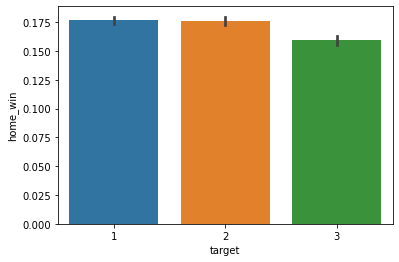

In [144]:
sns.barplot(x='target',  y='home_win', data=train)          
plt.show()

In [13]:
for i in range(1,11):
    train['home_win_'+str(i)] = train['home_team_history_goal_'+str(i)] > train['home_team_history_opponent_goal_'+str(i)]
    train['home_loss_'+str(i)] = train['home_team_history_goal_'+str(i)] < train['home_team_history_opponent_goal_'+str(i)]
    train['home_draw_'+str(i)] = train['home_team_history_goal_'+str(i)] == train['home_team_history_opponent_goal_'+str(i)]
    
    train['away_win_'+str(i)] = train['away_team_history_goal_'+str(i)] > train['away_team_history_opponent_goal_'+str(i)]
    train['away_loss_'+str(i)] = train['away_team_history_goal_'+str(i)] < train['away_team_history_opponent_goal_'+str(i)]
    train['away_draw_'+str(i)] = train['away_team_history_goal_'+str(i)] == train['away_team_history_opponent_goal_'+str(i)]

train['home_win'] = train[[i for i in train.columns if 'home_win' in i]].median(axis=1)
train['home_loss'] = train[[i for i in train.columns if 'home_loss' in i]].median(axis=1)
train['home_draw'] = train[[i for i in train.columns if 'home_draw' in i]].median(axis=1)

train['away_win'] = train[[i for i in train.columns if 'away_win' in i]].median(axis=1)
train['away_loss'] = train[[i for i in train.columns if 'away_loss' in i]].median(axis=1)
train['away_draw'] = train[[i for i in train.columns if 'away_draw' in i]].median(axis=1)

away_team_history_goal = [i for i in train.columns if 'away_team_history_goal' in i]
away_team_history_opponent_goal = [i for i in train.columns if 'away_team_history_opponent_goal' in i]
away_team_history_rating = [i for i in train.columns if 'away_team_history_rating' in i]
away_team_history_opponent_rating = [i for i in train.columns if 'away_team_history_opponent_rating' in i]

home_team_history_goal = [i for i in train.columns if 'home_team_history_goal' in i]
home_team_history_opponent_goal = [i for i in train.columns if 'home_team_history_opponent_goal' in i]
home_team_history_rating = [i for i in train.columns if 'home_team_history_rating' in i]
home_team_history_opponent_rating = [i for i in train.columns if 'home_team_history_opponent_rating' in i]

train['home_goal'] = train[home_team_history_goal].sum(axis=1)
train['home_opp_goal'] = train[home_team_history_opponent_goal].sum(axis=1)
train['home_rating'] = train[home_team_history_rating].mean(axis=1)
train['home_opp_rating'] = train[home_team_history_opponent_rating].mean(axis=1)

train['away_goal'] = train[away_team_history_goal].sum(axis=1)
train['away_opp_goal'] = train[away_team_history_opponent_goal].sum(axis=1)
train['away_rating'] = train[away_team_history_rating].mean(axis=1)
train['away_opp_rating'] = train[away_team_history_opponent_rating].mean(axis=1)

In [52]:
df = train[['target', 'home_team_name', 'away_team_name', 'away_team_history_goal_1', 'away_team_history_rating_1','away_team_history_opponent_goal_1', 'away_team_history_opponent_rating_1','home_team_history_is_play_home_1', 'away_team_history_goal_1', 'away_team_history_opponent_goal_1', 'away_team_history_is_play_home_1']]
# df[df.target == 'home'].head(10)
df.head(10)

,target,home_team_name,away_team_name,away_team_history_goal_1,away_team_history_rating_1,away_team_history_opponent_goal_1,away_team_history_opponent_rating_1,home_team_history_is_play_home_1,away_team_history_goal_1,away_team_history_opponent_goal_1,away_team_history_is_play_home_1
0,NaN,Newell's Old Boys,River Plate,1.0,4.598000,2.0,5.253225,0.0,1.0,2.0,0.0
1,NaN,Real Estelí,Deportivo Las Sabanas,1.0,6.000588,0.0,6.881762,1.0,1.0,0.0,0.0
2,NaN,UPNFM,Marathón,3.0,8.379419,1.0,5.487338,0.0,3.0,1.0,0.0
3,NaN,León,Morelia,3.0,5.998800,3.0,5.998800,0.0,3.0,3.0,1.0
4,NaN,Cobán Imperial,Iztapa,4.0,6.349390,1.0,5.575180,0.0,4.0,1.0,1.0
10,NaN,Querétaro,Necaxa,3.0,6.543400,0.0,5.173150,0.0,3.0,0.0,1.0
15,NaN,Sagamihara,Parceiro Nagano,2.0,7.764194,1.0,4.302937,1.0,2.0,1.0,0.0
16,NaN,Kamatamare Sanuki,Vanraure Hachinohe,2.0,5.778656,1.0,5.438182,0.0,2.0,1.0,0.0
17,NaN,Cerezo Osaka U23,Blaublitz Akita,0.0,4.509140,1.0,6.939157,1.0,0.0,1.0,0.0
18,NaN,ThespaKusatsu Gunma,Grulla Morioka,1.0,4.302937,2.0,7.764194,0.0,1.0,2.0,1.0


In [14]:
def history_target(row,i,j):    
    if row[j+'_team_history_goal_'+str(i)] > row[j+'_team_history_opponent_goal_'+str(i)]:
        val = 1
    elif row[j+'_team_history_goal_'+str(i)] < row[j+'_team_history_opponent_goal_'+str(i)]:
        val = -1
    else:
        val = 0
    return val

In [15]:
def goal(row,i,j):
    if row[j+'_team_history_is_play_home_'+str(i)] == 1:
        val = row[j+'_team_history_goal_'+str(i)]
    else:        
        val = row[j+'_team_history_opponent_goal_'+str(i)]
    return val

In [16]:
for i in range(1,11):
    for j in ['home', 'away']:
        train[j+'_history_goal_'+str(i)] = train.apply(goal, i=i, j=j, axis=1)

In [17]:
def rating(row,i,j):
    if row[j+'_team_history_is_play_home_'+str(i)] == 1:
        val = row[j+'_team_history_rating_'+str(i)]
    else:
        val = row[j+'_team_history_opponent_rating_'+str(i)]
    return val

### Team result 

In [18]:
def team_result(row,i,j,k):            
    if row[j+'_team_history_is_play_home_'+str(i)] == 1:
        if k == 'win':
            if row[j+'_team_history_goal_'+str(i)] > row[j+'_team_history_opponent_goal_'+str(i)]:
                val = 1
            else:
                val = 0
        elif k == 'loss':                     
            if row[j+'_team_history_goal_'+str(i)] < row[j+'_team_history_opponent_goal_'+str(i)]:
                val = 1
            else:
                val = 0
        else:
            if row[j+'_team_history_goal_'+str(i)] == row[j+'_team_history_opponent_goal_'+str(i)]:
                val = 1
            else:
                val = 0
            
    else:
        if k == 'win':
            if row[j+'_team_history_goal_'+str(i)] > row[j+'_team_history_opponent_goal_'+str(i)]:
                val = 1
            else:
                val = 0
        elif k == 'loss':                     
            if row[j+'_team_history_goal_'+str(i)] < row[j+'_team_history_opponent_goal_'+str(i)]:
                val = 1
            else:
                val = 0
        else:
            if row[j+'_team_history_goal_'+str(i)] == row[j+'_team_history_opponent_goal_'+str(i)]:
                val = 1
            else:
                val = 0
    return val

In [19]:
# Team Result
for i in range(1,11):
    for j in ['home', 'away']:        
        for k in ['win', 'loss', 'draw']:
            train[j+'_team_'+k+'_'+str(i)] = train.apply(team_result, i=i, j=j, k=k, axis=1)

In [20]:
results = [i for i in train.columns if ('_team_win' in i) or ('_team_loss' in i) or ('_team_draw' in i)]
away_results = [i for i in train.columns if 'away_team_result_' in i]
# home = train[home_results].apply(pd.Series.value_counts, axis=1).fillna(0)
# away = train[away_results].apply(pd.Series.value_counts, axis=1).fillna(0)

In [245]:
train[home_results]

,home_team_win_1,home_team_loss_1,home_team_draw_1,away_team_win_1,away_team_loss_1,away_team_draw_1,home_team_win_2,home_team_loss_2,home_team_draw_2,away_team_win_2,away_team_loss_2,away_team_draw_2,home_team_win_3,home_team_loss_3,home_team_draw_3,away_team_win_3,away_team_loss_3,away_team_draw_3,home_team_win_4,home_team_loss_4,home_team_draw_4,away_team_win_4,away_team_loss_4,away_team_draw_4,home_team_win_5,home_team_loss_5,home_team_draw_5,away_team_win_5,away_team_loss_5,away_team_draw_5,home_team_win_6,home_team_loss_6,home_team_draw_6,away_team_win_6,away_team_loss_6,away_team_draw_6,home_team_win_7,home_team_loss_7,home_team_draw_7,away_team_win_7,away_team_loss_7,away_team_draw_7,home_team_win_8,home_team_loss_8,home_team_draw_8,away_team_win_8,away_team_loss_8,away_team_draw_8,home_team_win_9,home_team_loss_9,home_team_draw_9,away_team_win_9,away_team_loss_9,away_team_draw_9,home_team_win_10,home_team_loss_10,home_team_draw_10,away_team_win_10,away_team_loss_10,away_team_draw_10
0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
2,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
3,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
4,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110932,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
110934,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0
110935,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0
110936,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1


In [195]:
away.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64117 entries, 0 to 110937
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   away_draw  64117 non-null  float64
 1   away_loss  64117 non-null  float64
 2   away_win   64117 non-null  float64
dtypes: float64(3)
memory usage: 4.0 MB


In [196]:
home = home.rename(columns={
    'win': 'home_win',
    'loss': 'home_loss',
    'draw': 'home_draw',
})

In [197]:
home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64117 entries, 0 to 110937
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   home_draw  64117 non-null  float64
 1   home_loss  64117 non-null  float64
 2   home_win   64117 non-null  float64
dtypes: float64(3)
memory usage: 4.0 MB


In [198]:
train = pd.concat([train, home, away] , axis=1, join='inner')

In [219]:
train[home_results]

,home_team_result_1,home_team_result_2,home_team_result_3,home_team_result_4,home_team_result_5,home_team_result_6,home_team_result_7,home_team_result_8,home_team_result_9,home_team_result_10
0,"[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]"
1,"[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]"
2,"[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]"
3,"[0.0, 0.0, 1.0]","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]"
4,"[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...
110932,"[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]"
110934,"[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]","[0.0, 1.0, 0.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]"
110935,"[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]","[0.0, 0.0, 1.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 1.0]"
110936,"[0.0, 0.0, 1.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]","[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]","[1.0, 0.0, 0.0]"


In [20]:
# history target
for i in range(1,11):
    for j in ['home', 'away']:
        train[j+'_history_target_'+str(i)] = train.apply(history_target, i=i, j=j, axis=1)

In [144]:
train

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

In [23]:
team_result = [i for i in train.columns if '_team_result_' in i]
history_target = [i for i in train.columns if '_history_target_' in i]
train[team_result]

,home_team_result_1,away_team_result_1,home_team_result_2,away_team_result_2,home_team_result_3,away_team_result_3,home_team_result_4,away_team_result_4,home_team_result_5,away_team_result_5,home_team_result_6,away_team_result_6,home_team_result_7,away_team_result_7,home_team_result_8,away_team_result_8,home_team_result_9,away_team_result_9,home_team_result_10,away_team_result_10
0,1,1,1,1,1,-1,-1,-1,-1,1,0,1,0,0,1,1,0,1,1,1
1,-1,-1,1,-1,1,1,1,0,-1,-1,1,1,1,1,1,0,1,1,0,1
2,-1,-1,1,1,1,0,1,-1,1,-1,0,1,0,0,1,1,1,-1,0,0
3,0,0,-1,1,1,1,0,0,1,1,1,0,-1,-1,0,-1,1,-1,0,1
4,1,1,1,1,-1,0,1,1,0,0,1,1,-1,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110933,-1,1,0,1,1,0,0,-1,1,-1,1,-1,-1,1,-1,0,-1,1,1,1
110934,1,0,1,1,-1,1,1,1,-1,1,0,1,-1,-1,1,1,1,0,0,1
110935,0,0,1,1,1,1,0,0,1,1,0,-1,0,1,0,-1,1,-1,0,-1
110936,0,0,-1,0,0,0,-1,1,0,1,1,-1,1,0,-1,-1,0,1,1,0


In [83]:

for i in range(1,11):
    for j in ['home', 'away']:
        train[j+'_history_target_'+str(i)] = train.apply(history_target, i=i, j=j, axis=1)

In [21]:
home_history_result = [i for i in train.columns if 'home_history_result' in i]
away_history_result = [i for i in train.columns if 'away_history_result' in i]
home_history_rating = [i for i in train.columns if 'home_rating' in i]
away_history_rating = [i for i in train.columns if 'away_rating' in i]

train['home_history_rating'] = train[home_history_rating].mean(axis=1)
train['away_history_rating'] = train[away_history_rating].mean(axis=1)

train['home_history_result'] = train[home_history_result].sum(axis=1)
train['away_history_result'] = train[away_history_result].sum(axis=1)

In [22]:
home_goal = [i for i in train.columns if '_goal_' in i]
away_goal = [i for i in train.columns if 'opponent_goal' in i]
train['home_goal'] = train[home_goal].mean(axis=1)
train['away_goal'] = train[away_goal].mean(axis=1)
home_goal

['home_team_history_goal_1',
 'home_team_history_goal_2',
 'home_team_history_goal_3',
 'home_team_history_goal_4',
 'home_team_history_goal_5',
 'home_team_history_goal_6',
 'home_team_history_goal_7',
 'home_team_history_goal_8',
 'home_team_history_goal_9',
 'home_team_history_goal_10',
 'home_team_history_opponent_goal_1',
 'home_team_history_opponent_goal_2',
 'home_team_history_opponent_goal_3',
 'home_team_history_opponent_goal_4',
 'home_team_history_opponent_goal_5',
 'home_team_history_opponent_goal_6',
 'home_team_history_opponent_goal_7',
 'home_team_history_opponent_goal_8',
 'home_team_history_opponent_goal_9',
 'home_team_history_opponent_goal_10',
 'away_team_history_goal_1',
 'away_team_history_goal_2',
 'away_team_history_goal_3',
 'away_team_history_goal_4',
 'away_team_history_goal_5',
 'away_team_history_goal_6',
 'away_team_history_goal_7',
 'away_team_history_goal_8',
 'away_team_history_goal_9',
 'away_team_history_goal_10',
 'away_team_history_opponent_goal_1',

In [23]:
train['home_point'] =train['home_history_result'] * train['home_history_rating'] / train['home_goal']
train['away_point'] = train['away_history_result'] * train['away_history_rating'] / train['away_goal']

In [46]:
a = train[['target', 'home_team_name', 'away_team_name', 'home_history_result_1', 'away_history_target_1']]
a[a.target == 'draw']

KeyError: "['home_history_result_1', 'away_history_target_1'] not in index"

In [47]:
sns.barplot(x='target',  y='away_history_target_1', data=train)          
plt.show()

ValueError: Could not interpret input 'away_history_target_1'

In [200]:
train['home_win'] = train['home_win'].astype(int)
train['away_win'] = train['away_win'].astype(int)

In [212]:
train['win'] = train['home_win'] 

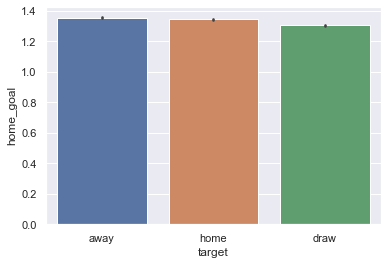

In [216]:
sns.barplot(x='target',  y='home_goal', data=train)          
plt.show()

In [49]:
train[['target', 'home_goal', 'away_goal']].corr()

,home_goal,away_goal
home_goal,NaN,NaN
away_goal,NaN,NaN


In [24]:
target = {
    'home': 1,
    'away': 2,
    'draw': 3,
}

train['target'] = train['target'].map(target)

In [15]:
home_history_goal = [i for i in train.columns if 'home_team_history_goal_' in i]
home_history_rating = [i for i in train.columns if 'home_team_history_rating_' in i] 

home_oppo_history_goal = [i for i in train.columns if 'home_team_history_opponent_goal_' in i]
home_oppo_history_rating = [i for i in train.columns if 'home_team_history_opponent_rating_' in i] 

home_point = [i for i in train.columns if 'home_point_' in i]
home_oppo_point = [i for i in train.columns if 'home_oppo_point_' in i]


In [53]:
home_oppo_history_rating

['home_team_history_opponent_rating_1',
 'home_team_history_opponent_rating_2',
 'home_team_history_opponent_rating_3',
 'home_team_history_opponent_rating_4',
 'home_team_history_opponent_rating_5',
 'home_team_history_opponent_rating_6',
 'home_team_history_opponent_rating_7',
 'home_team_history_opponent_rating_8',
 'home_team_history_opponent_rating_9',
 'home_team_history_opponent_rating_10']

In [25]:
for i in range(1,11):
    train['home_point_'+str(i)] = train['home_team_history_goal_'+str(i)] * train['home_team_history_rating_'+str(i)]
    train['home_oppo_point_'+str(i)] = train['home_team_history_opponent_goal_'+str(i)] * train['home_team_history_opponent_rating_'+str(i)]
    

In [214]:
train[['target']+home_point[:3]+home_oppo_point[:3]]

,target
0,away
1,home
2,draw
3,away
4,home
...,...
110932,away
110934,away
110935,draw
110936,away


In [26]:
home_p = []
train['home_points'] = train[home_point].mean(axis=1)
train['home_oppo_point'] = train[home_oppo_point].mean(axis=1)
#     train['home_oppo_points'] = train['home_team_history_opponent_goal_'+str(i)] * train['home_team_history_opponent_rating_'+str(i)]

NameError: name 'home_point' is not defined

In [57]:
sns.barplot(x='target',  y='home_oppo_point', data=train)          
plt.show()

ValueError: min() arg is an empty sequence

In [ ]:
dic = {
    'win': 2,
    'loss': 0,
    'draw': 1,
}
train['target'] = train['target'].map(target)

In [ ]:
trian

In [27]:
teams = dict.fromkeys(list(train['home_team_name'].value_counts().keys()) + list(train['away_team_name'].value_counts().keys()))
dic = {}
for i, team in enumerate(teams):
    dic[team] = i

In [39]:
train['home_team_name']=train['home_team_name'].map(dic)
train['away_team_name']=train['away_team_name'].map(dic)

In [134]:
train[train['target'] == 'draw'][['target', 'home_team_name', 'away_team_name'] + home_results + away_results ]

,target,home_team_name,away_team_name,home_team_result_1,home_team_result_2,home_team_result_3,home_team_result_4,home_team_result_5,home_team_result_6,home_team_result_7,home_team_result_8,home_team_result_9,home_team_result_10,away_team_result_1,away_team_result_2,away_team_result_3,away_team_result_4,away_team_result_5,away_team_result_6,away_team_result_7,away_team_result_8,away_team_result_9,away_team_result_10
2,draw,UPNFM,Marathón,loss,win,win,win,win,draw,draw,win,win,draw,loss,win,draw,loss,loss,win,draw,win,loss,draw
19,draw,Giravanz Kitakyushu,Gainare Tottori,win,loss,draw,win,win,loss,win,loss,loss,loss,win,loss,loss,draw,loss,win,draw,loss,win,win
28,draw,Daegu,Seoul,loss,loss,draw,loss,loss,draw,loss,draw,draw,draw,loss,loss,draw,win,loss,loss,draw,win,win,loss
35,draw,Kokand-1912,Navbahor,draw,loss,loss,loss,loss,draw,win,win,win,loss,loss,win,draw,draw,win,draw,loss,win,loss,draw
53,draw,Arema,Kalteng Putra,win,draw,win,win,win,win,draw,draw,win,win,win,win,win,win,loss,win,win,win,draw,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110899,draw,Al Ahly,El Gounah,loss,loss,loss,win,win,draw,loss,loss,draw,win,win,win,win,loss,draw,draw,loss,draw,loss,win
110900,draw,National Bank of Egypt,Ceramica Cleopatra,win,win,loss,draw,loss,loss,win,draw,draw,loss,win,draw,loss,loss,win,draw,win,draw,loss,draw
110905,draw,Al Duhail,Al Ahli Jeddah,draw,win,draw,win,win,draw,loss,loss,loss,win,draw,win,loss,draw,win,loss,win,loss,loss,win
110927,draw,Rio Claro,Portuguesa,draw,win,loss,win,loss,draw,draw,draw,win,win,win,win,draw,draw,win,loss,draw,draw,win,loss


In [135]:
train[train['target'] == 'home'][['target', 'home_team_name', 'away_team_name'] + home_results + away_results ]

,target,home_team_name,away_team_name,home_team_result_1,home_team_result_2,home_team_result_3,home_team_result_4,home_team_result_5,home_team_result_6,home_team_result_7,home_team_result_8,home_team_result_9,home_team_result_10,away_team_result_1,away_team_result_2,away_team_result_3,away_team_result_4,away_team_result_5,away_team_result_6,away_team_result_7,away_team_result_8,away_team_result_9,away_team_result_10
1,home,Real Estelí,Deportivo Las Sabanas,loss,win,win,win,loss,win,win,win,win,draw,loss,loss,win,draw,loss,win,win,draw,win,win
4,home,Cobán Imperial,Iztapa,win,win,loss,win,draw,win,loss,draw,win,draw,win,win,draw,win,draw,win,win,win,win,draw
16,home,Kamatamare Sanuki,Vanraure Hachinohe,win,win,win,loss,draw,draw,win,loss,draw,win,loss,win,draw,win,loss,win,loss,loss,win,loss
18,home,ThespaKusatsu Gunma,Grulla Morioka,loss,loss,draw,win,draw,win,draw,draw,win,loss,loss,win,draw,win,loss,win,win,loss,win,win
20,home,Roasso Kumamoto,Fukushima United,win,win,draw,win,win,draw,draw,win,draw,loss,loss,loss,win,loss,win,loss,draw,loss,win,loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110912,home,MC Alger,NC Magra,loss,win,draw,loss,win,draw,draw,win,draw,loss,draw,draw,win,draw,win,draw,loss,win,draw,draw
110919,home,Podillya Khmelnytskyi,Nyva Vinnytsya,draw,win,loss,loss,draw,draw,draw,win,win,win,win,win,loss,win,draw,win,win,draw,win,win
110921,home,Hassania Agadir,Mouloudia Oujda,loss,loss,loss,win,draw,draw,win,draw,draw,win,loss,draw,win,loss,win,loss,loss,loss,win,loss
110931,home,Sport Boys,Deportivo Municipal,win,draw,win,win,loss,win,loss,loss,loss,win,win,win,win,loss,loss,win,loss,loss,draw,draw


In [115]:
train[train['home_team_history_goal_6'] == 21]

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

In [118]:
train[train['target'] == 'draw'].head(7)

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

In [119]:
train[train['target'] == 'home'].head(7)

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

In [114]:
train[['home_score', 'away_score']] = train['score'].str.split('-', expand=True)
# train['score'].str.split('-', expand=True)

In [70]:
train[['home_score', 'away_score']]

,home_score,away_score
0,2,3
1,1,0
2,2,2
3,1,2
4,1,0
...,...,...
110932,2,3
110934,0,3
110935,1,1
110936,0,4


C:\Users\Ameri_4o1vsnk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

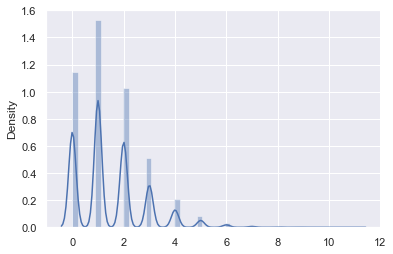

In [89]:
sns.distplot(train[['home_score']])

C:\Users\Ameri_4o1vsnk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

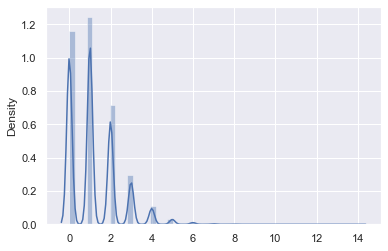

In [90]:
sns.distplot(train[['away_score']])

In [91]:
train['is_cup'] = pd.factorize(train['is_cup'])[0]+1

In [29]:
def add_features(df):
    for i in range(1, 11): # range from 1 to 10
        # Feat. difference of days
        df[f'home_team_history_match_DIFF_day_{i}'] = (pd.to_datetime(df['match_date']) - pd.to_datetime(df[f'home_team_history_match_date_{i}'])).dt.days
        df[f'away_team_history_match_DIFF_days_{i}'] = (pd.to_datetime(df['match_date']) - pd.to_datetime(df[f'away_team_history_match_date_{i}'])).dt.days
    # Feat. difference of scored goals
        df[f'home_team_history_DIFF_goal_{i}'] = df[f'home_team_history_goal_{i}'] - df[f'home_team_history_opponent_goal_{i}']
        df[f'away_team_history_DIFF_goal_{i}'] = df[f'away_team_history_goal_{i}'] - df[f'away_team_history_opponent_goal_{i}']
    # Results: multiple nested where # away:0, draw:1, home:2
        df[f'home_team_result_{i}'] = np.where(df[f'home_team_history_DIFF_goal_{i}'] > 0, 2,
                         (np.where(df[f'home_team_history_DIFF_goal_{i}'] == 0, 1,
                                   np.where(df[f'home_team_history_DIFF_goal_{i}'].isna(), np.nan, 0))))
        df[f'away_team_result_{i}'] = np.where(df[f'away_team_history_DIFF_goal_{i}'] > 0, 2,
                         (np.where(df[f'away_team_history_DIFF_goal_{i}'] == 0, 1,
                                   np.where(df[f'away_team_history_DIFF_goal_{i}'].isna(), np.nan, 0))))
    # Feat. difference of rating ("modified" ELO RATING)
        df[f'home_team_history_ELO_rating_{i}'] = 1/(1+10**((df[f'home_team_history_opponent_rating_{i}']-df[f'home_team_history_rating_{i}'])/10))
        df[f'away_team_history_ELO_rating_{i}'] = 1/(1+10**((df[f'away_team_history_opponent_rating_{i}']-df[f'away_team_history_rating_{i}'])/10))
        # df[f'home_away_team_history_ELO_rating_{i}'] = 1/(1+10**((df[f'away_team_history_rating_{i}']-df[f'home_team_history_rating_{i}'])/10))
        # df[f'away_team_history_DIFF_rating_{i}'] =  - df[f'away_team_history_opponent_rating_{i}']
    # Feat. same coach id
        df[f'home_team_history_SAME_coaX_{i}'] = np.where(df['home_team_coach_id']==df[f'home_team_history_coach_{i}'],1,0)
        df[f'away_team_history_SAME_coaX_{i}'] = np.where(df['away_team_coach_id']==df[f'away_team_history_coach_{i}'],1,0) 
    # Feat. same league id
        df[f'home_team_history_SAME_leaG_{i}'] = np.where(df['league_id']==df[f'home_team_history_league_id_{i}'],1,0)
        df[f'away_team_history_SAME_leaG_{i}'] = np.where(df['league_id']==df[f'away_team_history_league_id_{i}'],1,0) 
    # Fill NA with -666
    # df.fillna(MASK, inplace = True)
    return df


In [30]:
train = add_features(train)

C:\Users\AMERIC~1\AppData\Local\Temp/ipykernel_5844/1999187886.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'away_team_history_match_DIFF_days_{i}'] = (pd.to_datetime(df['match_date']) - pd.to_datetime(df[f'away_team_history_match_date_{i}'])).dt.days
C:\Users\AMERIC~1\AppData\Local\Temp/ipykernel_5844/1999187886.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'home_team_history_DIFF_goal_{i}'] = df[f'home_team_history_goal_{i}'] - df[f'home_team_history_opponent_goal_{i}']
C:\Users\AMERIC~1\AppData\Local\Te

In [29]:
(pd.to_datetime(train['match_date']) - pd.to_datetime(train['home_team_history_match_date_1'])).dt.days

0         5.0
1         3.0
2         2.0
3         3.0
4         3.0
         ... 
110933    7.0
110934    6.0
110935    2.0
110936    7.0
110937    5.0
Length: 110938, dtype: float64

In [18]:
train['home_team_history_SAME_coaX_1'].value_counts()

1    62026
0     2091
Name: home_team_history_SAME_coaX_1, dtype: int64

In [20]:
fetures = [i for i in train.columns if ('coaX' in i) or ('leaG' in i) or ('ELO_rating' in i) or ('team_result' in i) or ('DIFF_goal' in i) or ('DIFF_day' in i)]

In [22]:
len(fetures)

120

In [45]:
for i in train:
    if 'match_date' in i:
        try:
            train[i] = pd.to_datetime(train[i]).dt.month.astype(int)        
        except:
            pass  

In [51]:
train['league_name'] = pd.factorize(train['league_name'])[0]+1

In [125]:
# x = train[['id', 'target', 'home_goal', 'home_team_name', 'away_team_name', 'home_opp_goal', 'home_team_coach_id', 'home_rating', 'home_opp_rating', 'away_goal', 'away_opp_goal', 'away_team_coach_id', 'away_rating','away_opp_rating',  'is_cup']]
x = train

In [126]:
x

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

In [127]:
x_train = x.loc[:, x.columns != 'target']
y_train = x['target']

In [128]:
x.shape

(64117, 534)

In [129]:
from sklearn.feature_selection import SelectKBest, chi2

In [131]:
X_new = SelectKBest(chi2).fit_transform(x_train, y_train)

ValueError: Input X must be non-negative.

In [ ]:
X_new.shape

In [132]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


ValueError: Input X must be non-negative.

In [88]:
train.isna().sum().sum()

0

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64117 entries, 0 to 110937
Columns: 534 entries, id to away_team_history_SAME_leaG_10
dtypes: int32(61), int64(473)
memory usage: 246.8 MB


In [123]:
train.select_dtypes(include=['float64'])

""
0
1
2
3
4
...
110932
110934
110935
110936


In [117]:
float_col = train.select_dtypes(include=['float64']) 
for col in float_col.columns.values:
    try:
        train[col] = train[col].astype('int64')
    except:
        pass

In [133]:
train

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,home_team_history_match_date_3,home_team_history_match_date_4,home_team_history_match_date_5,home_team_history_match_date_6,home_team_history_match_date_7,home_team_history_match_date_8,home_team_history_match_date_9,home_team_history_match_date_10,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,home_team_history_is_cup_1,home_team_history_is_cup_2,home_team_history_is_cup_3,home_team_history_is_cup_4,home_team_history_is_cup_5,home_team_history_is_cup_6,home_team_history_is_cup_7,home_team_history_is_cup_8,home_team_history_is_cup_9,home_team_history_is_cup_10,home_team_history_goal_1,home_team_history_goal_2,home_team_history_goal_3,home_team_history_goal_4,home_team_history_goal_5,home_team_history_goal_6,home_team_history_goal_7,home_team_history_goal_8,home_team_history_goal_9,home_team_history_goal_10,home_team_history_opponent_goal_1,home_team_history_opponent_goal_2,home_team_history_opponent_goal_3,home_team_history_opponent_goal_4,home_team_history_opponent_goal_5,home_team_history_opponent_goal_6,home_team_history_opponent_goal_7,home_team_history_opponent_goal_8,home_team_history_opponent_goal_9,home_team_history_opponent_goal_10,home_team_history_rating_1,home_team_history_rating_2,home_team_history_rating_3,home_team_history_rating_4,home_team_history_rating_5,home_team_history_rating_6,home_team_history_rating_7,home_team_history_rating_8,home_team_history_rating_9,home_team_history_rating_10,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,home_team_history_coach_1,home_team_history_coach_2,home_team_history_coach_3,home_team_history_coach_4,home_team_history_coach_5,home_team_history_coach_6,home_team_history_coach_7,home_team_history_coach_8,home_team_history_coach_9,home_team_history_coach_10,home_team_history_league_id_1,home_team_history_league_id_2,home_team_history_league_id_3,home_team_history_league_id_4,home_team_history_league_id_5,home_team_history_league_id_6,home_team_history_league_id_7,home_team_history_league_id_8,home_team_history_league_id_9,home_team_history_league_id_10,away_team_history_match_date_1,away_team_history_match_date_2,away_team_history_match_date_3,away_team_history_match_date_4,away_team_history_match_date_5,away_team_history_match_date_6,away_team_history_match_date_7,away_team_history_match_date_8,away_team_history_match_date_9,away_team_history_match_date_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10,away_team_history_goal_1,away_team_history_goal_2,away_team_history_goal_3,away_team_history_goal_4,away_team_history_goal_5,away_team_history_goal_6,away_team_history_goal_7,away_team_history_goal_8,away_team_history_goal_9,away_team_history_goal_10,away_team_history_

In [121]:
train['home_special'] = train['home_special'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [122]:
train.drop('home_special', axis=1, inplace=True)
train.drop('away_special', axis=1, inplace=True)